# Naive Bayes - Reklam Örneği

**Verinin okunması**

---


Öncelikle verileri pandas yardımı ile okuyoruz.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
dataset = pd.read_csv('data.csv')
dataset

,KullaniciID,Cinsiyet,Yas,TahminiMaas,SatinAldiMi
0,15624510,Erkek,19,19000,0
1,15810944,Erkek,35,20000,0
2,15668575,Kadın,26,43000,0
3,15603246,Kadın,27,57000,0
4,15804002,Erkek,19,76000,0
...,...,...,...,...,...
395,15691863,Kadın,46,41000,1
396,15706071,Erkek,51,23000,1
397,15654296,Kadın,50,20000,1
398,15755018,Erkek,36,33000,0


belirli reklam girdileri sonucunda kullanıcının ürünü satın alıp almadığı **SatinAldiMi** kolonundan anlıyoruz.

sadece yaş ve maas değerlerini alıyoruz.

In [0]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [0]:
print(X.shape)
print(y.shape)

(400, 2)
(400,)


**Verileri Eğitim ve Test Olarak Ayırma**


---


verilerimizin yüzde 25 ini test olarak ayırdık. geri kalan kısmın eğitim için kullanacağız.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Normalizasyon**


---


Yaş ve Tahmini maaş alanları aynı birimde olmadığı için, bunları değerleri ölçeklendireceğiz.

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Model Oluşturmak**


---

scikit-learn kütüphanesindeki GaussianNB sınıfını kullanarak modeli oluştuup eğiteceğiz.

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Tahmin**

---

yukarıda yüzde 25 ini test için ayrdığımız verileri tahmin etmeye çalışalım

In [0]:
y_pred = classifier.predict(X_test)
karsilastirmali_data = []
for i in range(len(y_test)):
  sonuc = 'DOĞRU'
  if y_test[i] != y_pred[i]:
    sonuc = 'YANLIŞ'
  karsilastirmali_data.append([y_test[i],y_pred[i],sonuc])
df = pd.DataFrame(karsilastirmali_data, columns = ['Gerçek', 'Tahmin','Sonuç'])
df

,Gerçek,Tahmin,Sonuç
0,0,0,DOĞRU
1,0,0,DOĞRU
2,0,0,DOĞRU
3,0,0,DOĞRU
4,0,0,DOĞRU
...,...,...,...
95,1,0,YANLIŞ
96,0,0,DOĞRU
97,1,1,DOĞRU
98,1,1,DOĞRU


**Görselleştirme**

---


Eğitim datasını görselleştirme

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


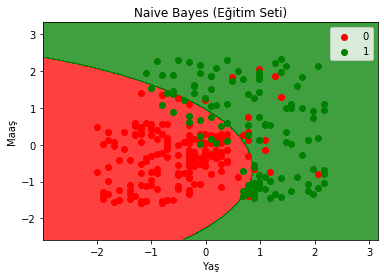

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
       plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                   c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Eğitim Seti)')
plt.xlabel('Yaş')
plt.ylabel('Maaş')
plt.legend()
plt.show()